In [5]:
from google.colab import files
import numpy as np
import pandas as pd

uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [6]:
df = pd.read_csv('IMDB Dataset.csv')
df.sample(5)

,review,sentiment
24810,This is a Very Very Boring and uninteresting a...,negative
36983,Just saw this film at the Fantasy Filmfest BER...,negative
28148,This was a strange film. A bit horror and cert...,negative
24281,I remembered this awful movie I bought at Came...,negative
6531,"I would purchase this and ""Thirty Seconds Over...",positive


In [7]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()

# Clean the reviews
df['review'] = df['review'].apply(clean_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=200)

In [8]:
# Convert sentiment labels to binary
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['sentiment'].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 167s 162ms/step - accuracy: 0.7051 - loss: 0.5529 - val_accuracy: 0.8530 - val_loss: 0.3572
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 188s 148ms/step - accuracy: 0.8789 - loss: 0.3020 - val_accuracy: 0.8485 - val_loss: 0.4443
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 156s 156ms/step - accuracy: 0.9085 - loss: 0.2422 - val_accuracy: 0.8773 - val_loss: 0.3175
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 202s 156ms/step - accuracy: 0.9248 - loss: 0.2029 - val_accuracy: 0.8568 - val_loss: 0.3388
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 201s 155ms/step - accuracy: 0.9402 - loss: 0.1644 - val_accuracy: 0.8570 - val_loss: 0.3437
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 156s 156ms/step - accuracy: 0.9499 - loss: 0.1428 - val_accuracy: 0.8704 - val_loss: 0.3602
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 202s 156ms/step - accuracy: 0.9627 - loss: 0.1092 - val_accuracy: 0.8589 - val_loss: 0.4076
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 156s 156ms/step - ac

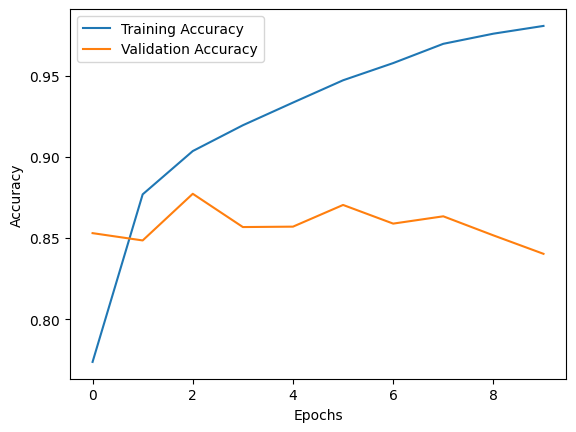

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.8347 - loss: 0.5452
Test Accuracy: 0.84


In [19]:
sample_reviews = [
    "I absolutely loved this movie! The plot was thrilling and the characters were so well developed.",
    "The film was a disaster. Poor acting and a predictable storyline."
]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200)

predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
['Positive', 'Negative']
